In [1]:
import rlssm
import pandas as pd
import os

/Users/Khamir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Import the grouped data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)

data = data[data.participant == 20].reset_index(drop=True)

data['block_label'] += 1

data.head()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,20,1.0,1.0,46.0,46.0,4,2,1.0,2.574407,1.0
1,20,1.0,2.0,60.0,33.0,4,2,2.0,1.952774,1.0
2,20,1.0,3.0,32.0,44.0,2,1,2.0,2.074999,0.0
3,20,1.0,4.0,56.0,40.0,4,2,3.5,2.320916,0.0
4,20,1.0,5.0,34.0,32.0,2,1,3.5,1.471107,1.0


#### Initialise the model

In [3]:
model = rlssm.DDModel(hierarchical_levels = 1)

Using cached StanModel


In [4]:
model.family, model.model_label, model.hierarchical_levels

('DDM', 'DDM', 1)

In [5]:
model.starting_point_bias

False

### Fit

In [6]:
# sampling parameters
n_iter = 1000
n_chains = 2
n_thin = 1

# bayesian model
drift_priors = None
threshold_priors = None
ndt_priors = None

starting_point = .5

In [7]:
model_fit = model.fit(
    data,
    drift_priors=drift_priors,
    threshold_priors=threshold_priors,
    ndt_priors=ndt_priors,
    starting_point=starting_point,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    pointwise_waic=False,
    verbose = False)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 1000 iterations ended with a divergence (0.0%)
0 of 1000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


#### get Rhat

In [8]:
model_fit.rhat.describe()

,rhat
count,3.000000
mean,1.003601
std,0.002360
min,1.001408
25%,1.002352
50%,1.003296
75%,1.004697
max,1.006098


In [9]:
model_fit.rhat.head()

,rhat,variable
0,1.001408,drift
1,1.006098,threshold
2,1.003296,ndt


#### get wAIC

In [10]:
model_fit.waic

{'lppd': -224.53079251766346,
 'p_waic': 4.584567420263923,
 'waic': 458.2307198758548,
 'waic_se': 35.658134283717864}

### Posteriors

In [11]:
model_fit.samples

,chain,draw,transf_drift,transf_threshold,transf_ndt
0,0,345,0.898345,1.899095,0.904377
1,0,86,1.109947,2.010315,0.914344
2,0,76,0.883568,1.952430,0.919060
3,0,29,0.909259,2.073794,0.905199
4,0,271,0.980759,2.035320,0.921973
...,...,...,...,...,...
995,1,95,0.884244,2.103992,0.933621
996,1,392,1.060798,2.051015,0.927875
997,1,498,0.973864,2.138269,0.902334
998,1,371,0.885151,2.071079,0.911193


In [12]:
model_fit.trial_samples

OrderedDict([('drift_t',
              array([[0.89834522, 0.89834522, 0.89834522, ..., 0.89834522, 0.89834522,
                      0.89834522],
                     [1.10994672, 1.10994672, 1.10994672, ..., 1.10994672, 1.10994672,
                      1.10994672],
                     [0.88356787, 0.88356787, 0.88356787, ..., 0.88356787, 0.88356787,
                      0.88356787],
                     ...,
                     [0.97386354, 0.97386354, 0.97386354, ..., 0.97386354, 0.97386354,
                      0.97386354],
                     [0.88515131, 0.88515131, 0.88515131, ..., 0.88515131, 0.88515131,
                      0.88515131],
                     [0.96080137, 0.96080137, 0.96080137, ..., 0.96080137, 0.96080137,
                      0.96080137]])),
             ('threshold_t',
              array([[1.89909495, 1.89909495, 1.89909495, ..., 1.89909495, 1.89909495,
                      1.89909495],
                     [2.01031534, 2.01031534, 2.01031534, ..., 

In [13]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

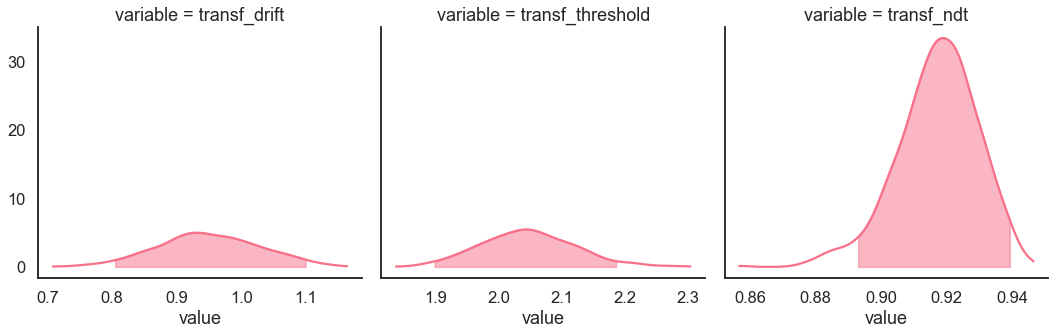

In [14]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

### Posterior predictives

#### Ungrouped

In [15]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.150377  1.091377  1.221377  1.193377  2.567377  1.573377   
2         1.143344  1.179344  1.798344  1.263344  1.146344  8.119344   
3         1.709060  1.251060  1.147060  1.372060  2.104060  1.688060   
4         2.252199  1.769199  2.181199  1.194199  3.051199  1.478199   
5         2.250973  1.096973  1.867973  1.345973  1.561973  1.185973   
...            ...       ...       ...       ...       ...       ...   
96        2.044667  1.271667  1.171667  2.679667  1.670667  1.751667   
97        1.814151  1.111151  1.415151  3.180151  1.197151  2.546151   
98        1.205312  1.251312  1.424312  1.473312  1.632312  1.975312   
99        1.117699  1.492699  1.631699  1.157699  1.206699  1.519699   
100       1.920632  1.323632  1.925632  1.141632  1.587632  1.360632   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      231  232  233  234   
sample                                            ...                           
1         1.659377  2.916377  1.054377  2.604377  ...      1.0  1.0  0.0  1.0   
2         1.422344  1.706344  1.361344  1.401344  ...      1.0  1.0  1.0  1.0   
3         1.432060  1.383060  1.219060  2.700060  ...      1.0  0.0  1.0  1.0   
4         1.832199  2.480199  1.376199  1.653199  ...      1.0  1.0  0.0  1.0   
5         1.219973  2.095973  2.129973  2.314973  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.627667  1.089667  2.006667  1.398667  ...      1.0  1.0  0.0  1.0   
97        2.022151  2.045151  1.469151  2.123151  ...      1.0  1.0  1.0  1.0   
98        1.104312  1.988312  1.042312  1.548312  ...      1.0  1.0  1.0  1.0   
99        1.633699  1.295699  2.294699  3.597699  ...      1.0  1.0  1.0  1.0   
100       2.209632  2.297632  1.146632  1.171632  ...      1.0  0.0  1.0  1.0   

variable                                
trial     235  236  237  238  239  240  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         1.0  0.0  1.0  1.0  1.0  0.0  
4         1.0  1.0  1.0  0.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        0.0  1.0  1.0  0.0  1.0  1.0  
97        1.0  1.0  0.0  1.0  1.0  0.0  
98        1.0  1.0  1.0  1.0  1.0  0.0  
99        1.0  1.0  1.0  1.0  1.0  1.0  
100       1.0  1.0  1.0  1.0  0.0  1.0  

[100 rows x 480 columns]

In [16]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.858333,1.739556,1.815173,1.098077,1.226977,1.533877,1.770377,2.393977,1.143377,1.297377,1.523877,1.961877,2.722377
2,0.866667,1.615031,1.850346,1.225344,1.317844,1.425344,1.625744,2.088644,1.143544,1.288544,1.512344,1.713344,2.225344
3,0.837500,1.636093,1.875602,1.175860,1.272060,1.467060,1.659660,1.995060,1.156060,1.291060,1.475060,1.755060,2.471060
4,0.875000,1.784712,1.521978,1.236399,1.497199,1.842199,1.951599,2.490899,1.160099,1.344599,1.575699,1.926099,2.555299
5,0.929167,1.733140,2.113670,1.239573,1.357573,1.613973,1.867573,2.648173,1.182373,1.350173,1.558973,1.899773,2.464373
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.870833,1.884221,3.513828,1.147667,1.262667,1.739667,1.893667,2.646667,1.205667,1.397467,1.636667,2.096667,2.855067
97,0.891667,1.667376,2.211374,1.172151,1.295151,1.444151,1.712151,2.385151,1.141451,1.270951,1.488651,1.757451,2.499051
98,0.891667,1.701645,1.556469,1.148312,1.286312,1.490812,1.715312,3.071312,1.143412,1.345112,1.545312,1.809512,2.485412


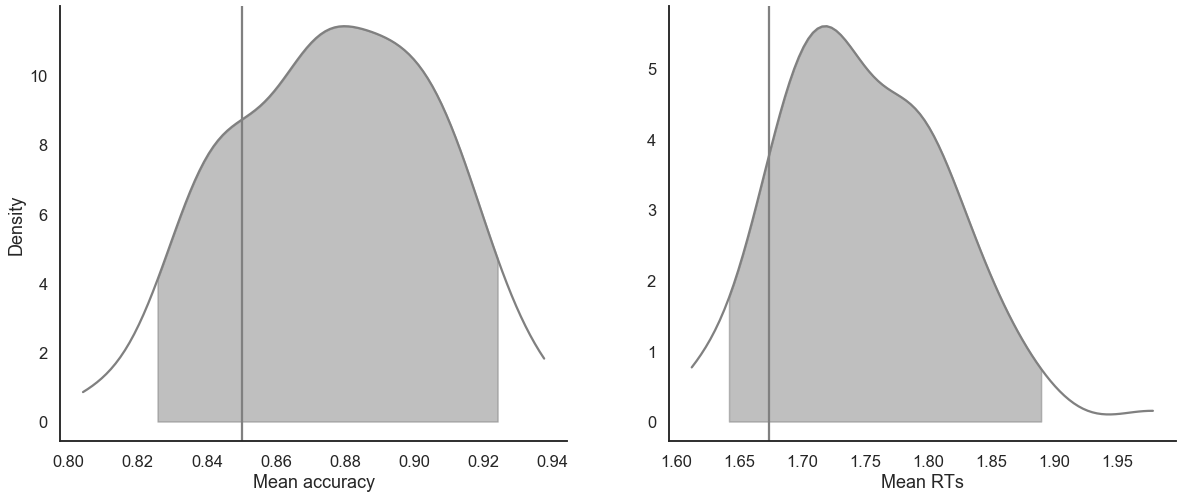

In [18]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

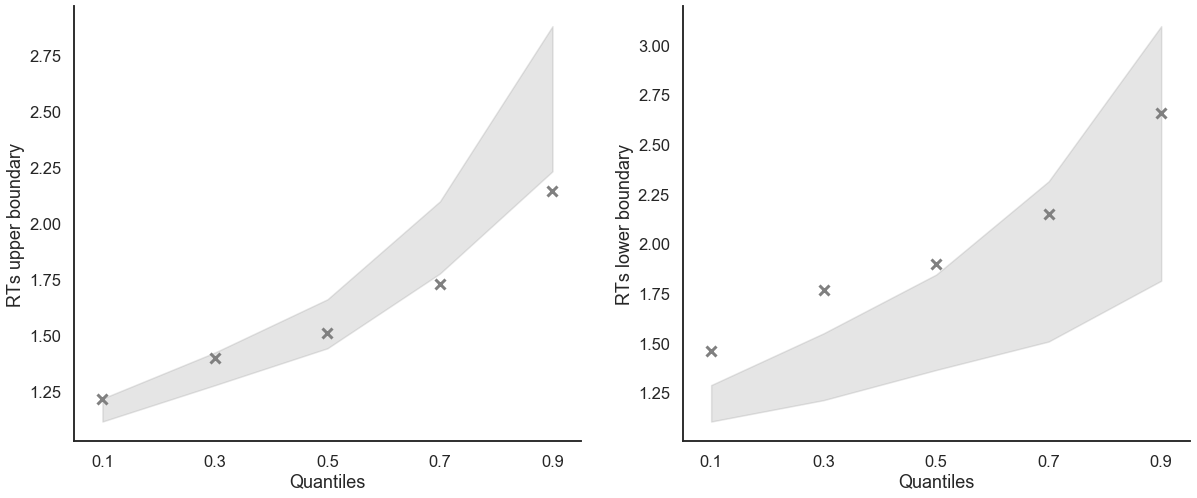

In [19]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

#### Grouped

In [20]:
import numpy as np

In [21]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [22]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_neg,accuracy_flipped,choice_pair,block_bins
0,0,20,1.0,1.0,46.0,46.0,4,2,1.0,2.574407,1.0,1,-0.0,BD,1
1,1,20,1.0,2.0,60.0,33.0,4,2,2.0,1.952774,1.0,1,-0.0,BD,1
2,2,20,1.0,3.0,32.0,44.0,2,1,2.0,2.074999,0.0,-1,1.0,AB,1
3,3,20,1.0,4.0,56.0,40.0,4,2,3.5,2.320916,0.0,-1,1.0,BD,1
4,4,20,1.0,5.0,34.0,32.0,2,1,3.5,1.471107,1.0,1,-0.0,AB,1


In [23]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1                0.80  1.676127  1.175583   
                        2                0.95  1.568144  2.320608   
                        3                0.95  1.569110  0.895593   
                        4                1.00  2.040449  1.021799   
                        5                1.00  1.790973  2.855367   
...                                       ...       ...       ...   
3.0         CD          96               1.00  1.967717  0.926563   
                        97               0.80  1.653751  0.648768   
                        98               0.95  1.682662  1.047883   
                        99               0.85  1.603949  1.176441   
                        100              0.90  1.612082  0.859333   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1.0         AB          1              1.433377        1.271377   
                        2              1.311344        1.316144   
                        3              1.298060        1.351060   
                        4                   NaN        1.553799   
                        5                   NaN        1.325073   
...                                         ...             ...   
3.0         CD          96                  NaN        1.551267   
                        97             1.607051        1.216151   
                        98             1.709312        1.291112   
                        99             1.592099        1.356499   
                        100            1.124432        1.196632   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1.0         AB          1              1.579377        1.429877   
                        2              1.311344        1.352344   
                        3              1.298060        1.546060   
                        4                   NaN        1.933699   
                        5                   NaN        1.467973   
...                                         ...             ...   
3.0         CD          96                  NaN        1.703667   
                        97             1.675651        1.363651   
                        98             1.709312        1.545312   
                        99             1.739699        1.449699   
                        100            1.157632        1.587132   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1.0         AB          1              1.738177        1.909377  
                        2              1.311344        1.537944  
                        3              1.298060        1.721660  
                        4                   NaN        2.317299  
                        5                   NaN        1.922073  
...                                         ...             ...  
3.0         CD          96                  NaN        2.328967  
                        97             1.734951        2.084151  
                        98             1.709312        1.905912  
                        99             1.942899        1.638699  
                        100            1.190832        1.920432  

[1200 rows x 9 columns]

In [24]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.866667  1.899144  1.070049         1.535977   
           2            0.933333  1.652977  0.763438         1.471044   
           3            0.833333  1.625860  1.061425         1.159060   
           4            0.966667  1.797399  1.597083         1.392199   
           5            0.833333  1.698373  1.762776         1.953373   
...                          ...       ...       ...              ...   
8          96           0.833333  1.755867  1.104029         1.404667   
           97           0.900000  1.537651  0.734304         1.148351   
           98           1.000000  1.584012  0.883700              NaN   
           99           0.933333  1.644565  2.034486         2.118399   
           100          0.833333  1.775665  1.855677         1.663632   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.445877         1.636377        1.692877   
           2             1.317844         1.548844        1.656344   
           3             1.301860         1.255060        1.500060   
           4             1.502599         1.392199        1.646199   
           5             1.289573         2.378973        1.403973   
...                           ...              ...             ...   
8          96            1.350867         1.632667        1.537667   
           97            1.255951         1.183151        1.490151   
           98            1.259112              NaN        1.465812   
           99            1.406599         2.510199        1.490699   
           100           1.312632         1.827632        1.397632   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.825577        2.005377  
           2              1.626644        1.816644  
           3              1.327860        1.860660  
           4              1.392199        1.866599  
           5              2.597373        1.619973  
...                            ...             ...  
8          96             1.648667        2.197867  
           97             1.271151        1.717751  
           98                  NaN        1.739712  
           99             2.901999        1.636399  
           100            2.264432        1.601632  

[800 rows x 9 columns]

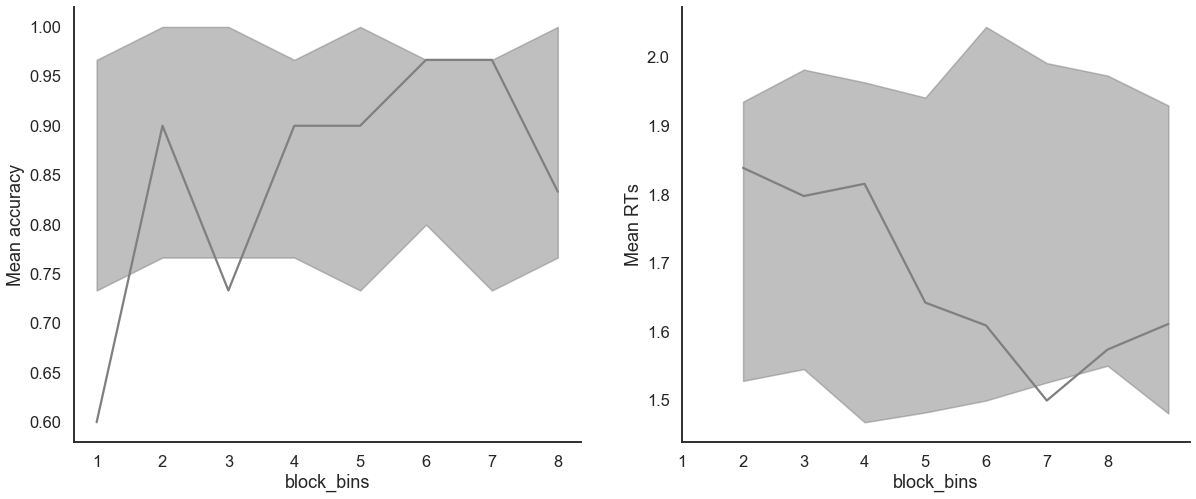

In [25]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

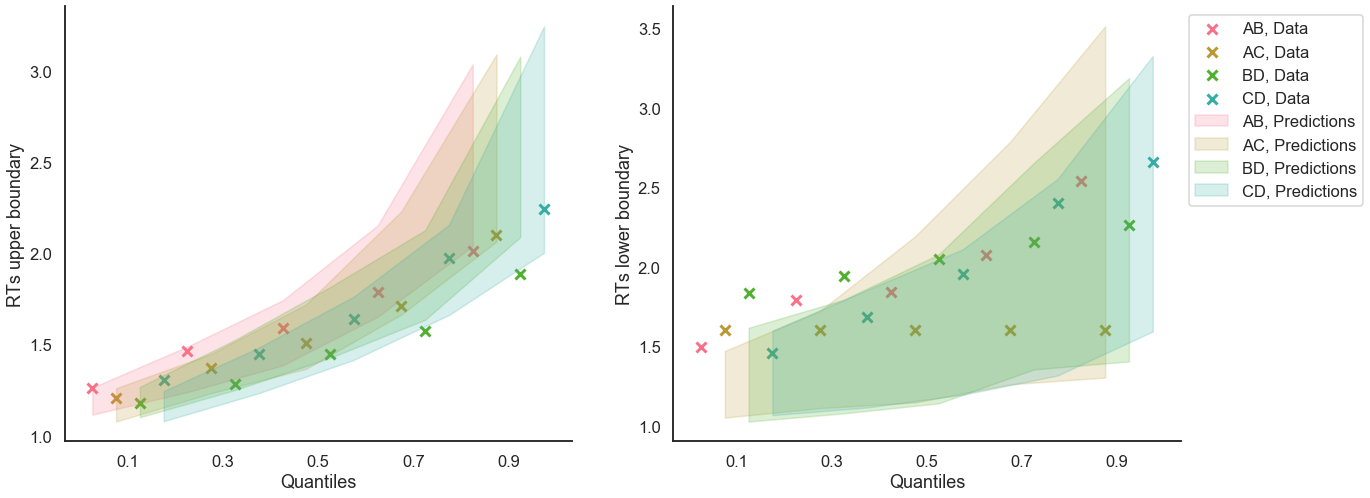

In [26]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

### Get last values for eventual further sampling

In [27]:
sv = model_fit.last_values
sv

,chain,draw,warmup,drift,ndt,threshold
499,0,499,0,1.043022,0.396829,2.003004
999,1,499,0,0.927147,0.411506,1.863591
